In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

<details><summary>추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
</summary>

- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 8. 대표적인 연속형 확률분포

- 정규분포 등 다양한 분포

- 구현 방법
  - NumPy
  - SciPy stats 모듈

- 임포트

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

# 소수점 이하 3자리까지 출력
%precision 3
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- E(X)와 V(X)

- check_prob()

- plot_prob()

In [4]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=(lambda x: x)):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=(lambda x: x)):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x)')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--')

    ax.legend()
    plt.show()

### 8-1. 정규분포

- **정규분포**(normal distribution)
  - 자연계 수많은 현상
  - **가우스 분포**(Gaussian distribution)
  - 실수 전체
  - 파라미터는 $μ$, $σ^2$

- 두 파라미터
  - 평균과 분산
  - $μ$ 실수, $σ$ 양의 실수
  - $N(μ$, $σ^2)$

- $N(μ$, $σ^2)$ 밀도함수

> **정규분포의 밀도함수**

> $$
> f(x) = \frac{1}{\sqrt{2π}σ}
> \exp\left\{ -\frac{(x-μ)^2}{2σ^2} \right\}
> \quad (-∞ ≤ x ≤ ∞) \tag{8-1}
> $$

- 구체적인 예

- **남자 고등학생의 키**
  - 키의 평균 170㎝, 표준편차 5㎝
  - $N(170, 5^2)$
  - 키가 165㎝ 이상 175㎝ 이하일 확률

$$
P(165≤X≤175) =
\int_{165}^{175}{ \frac{1}{ \sqrt{2π}×5}\exp\left\{ -\frac{(x-170)^2}{2×5^2} \right\} dx }
≃0.683
$$

- **모의고사 점수**
  - 모의고사 평균 70점, 표준편차 8점
  - $N(70, 8^2)
  - 점수가 54점 이상 86점 이하일 확률

$$
P(54≤X≤86) =
\int_{54}^{86}{ \frac{1}{ \sqrt{2π}×8}\exp\left\{ -\frac{(x-70)^2}{2×8^2} \right\} dx }
≃0.954
$$

- 기대값 / 분산

> **정규분포의 기대값과 분산**

> $X ∼ N(μ, σ^2)$이라고 할 때<br><br>
>
> $$E(X) = μ, \quad V(X) = σ^2 \tag{8-2}$$

- 정규분포의 중요한 성질
  - $X → aX+b$

> **정규분포의 변환**

> $X ∼ N(μ, σ^2)$이라고 할 때, 임의의 실수 $a$, $b$에 대해서<br><br>
>
> $$aX+b ∼ N(aμ+b, \, a^2σ^2) \tag{8-3}$$<br>
>
> 이 성립한다.

- $X ∼ N(μ, σ^2)$ $→$ $Z=\cfrac{X-μ}{σ} ∼ N(0, 1)$

- **표준정규분포**(standard normal distribution)

- 추정과 검정

- 기호 $Z$

- NumPy 구현

In [5]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / (np.sqrt(2*np.pi)*sigma) * \
                    np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

- $X ∼ N(2, 0.5^2)$

In [6]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

- 기대값은 $=2$ &nbsp; / &nbsp; 분산 $=0.5^2$

In [7]:
check_prob(X)

expected vaue 2.000
variance 0.250


- 밀도함수 / 분포함수 시각화

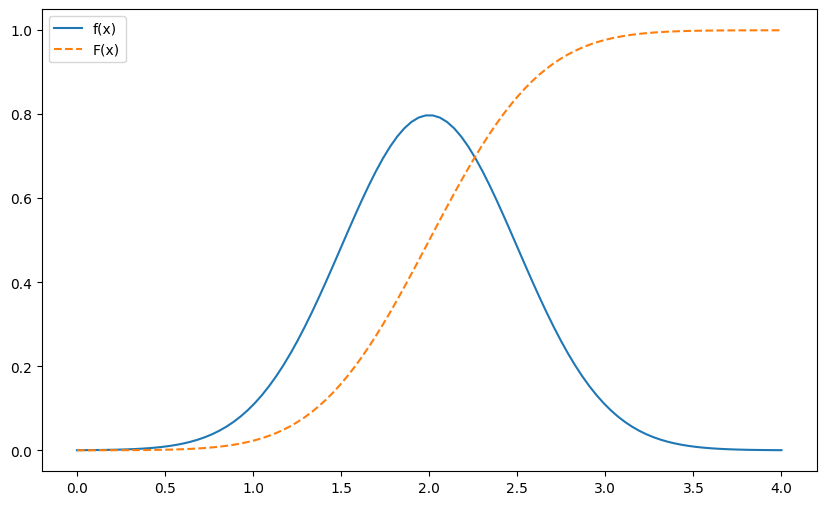

[그림 8-1] 정규분포


In [8]:
plot_prob(X, 0, 4)
print('[그림 8-1] 정규분포')

- scipy.stats
  - norm()

- 인자 $μ$ / $σ$
  - default argument : 0, 1

- 확률변수 $X ∼ N(2, 0.5^2)$ 생성

In [9]:
rv = stats.norm(2, 0.5)

- mean() 메서드 / var() 메서드

In [10]:
rv.mean(), rv.var()

(2.0, 0.25)

- pdf() 메서드
  - 확률 아님

In [11]:
rv.pdf(2)

0.7978845608028654

- cdf() 메서드
  - $P(X≤x)$

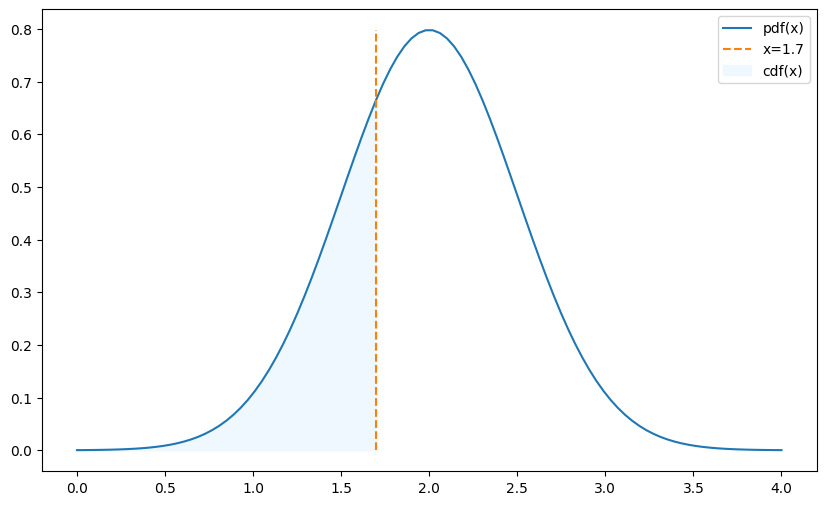

[그림 8-2] cdf(x)가 구하는 확률에 해당하는 면적


In [12]:
mean, sigma = 2, 0.5
rv = stats.norm(mean, sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_min, x_max = 0, 4
xs = np.linspace(x_min, x_max, 100)
ax.plot(xs, rv.pdf(xs), label='pdf(x)')

x_given = 1.7
fill_min, fill_max = x_min, x_given
xf = np.linspace(fill_min, fill_max, 100)
ax.vlines(xf.max(), 0, rv.pdf(xs).max(),
          label=f'x={x_given}', linestyles='--',
          color='#ff7f0e')
ax.fill_between(xf, rv.pdf(xf), label='cdf(x)',
                color='aliceblue')

ax.legend()
plt.show()
print('[그림 8-2] cdf(x)가 구하는 확률에 해당하는 면적')

- $P(X ≤ 1.7)$

In [13]:
rv.cdf(1.7)

0.27425311775007355

- isf() 메서드
  - **상위 100$α$%점** (upper 100$α$% point)
  - $P(X≥x)=α$

- 표준정규분포의 상위 100$α$%점
  - 기호 $z_α$
  - $P(Z ≥ z_α)=α$

  - $z_{1-α}=-z_α$

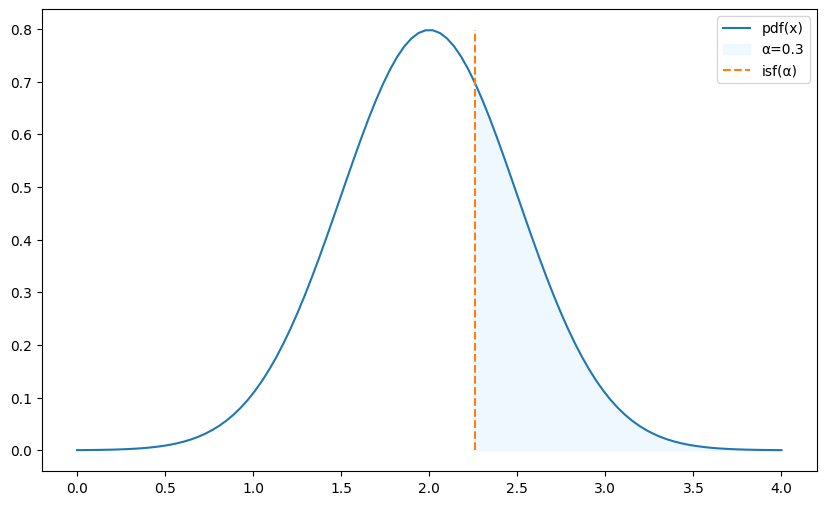

[그림 8-3] isf(α)가 계산하는 x


In [14]:
mean, sigma = 2, 0.5
rv = stats.norm(mean, sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_min, x_max = 0, 4
xs = np.linspace(x_min, x_max, 100)
ax.plot(xs, rv.pdf(xs), label='pdf(x)')

alpha = 0.3
x_alpha = rv.isf(alpha)
fill_min, fill_max = x_alpha, x_max
xf = np.linspace(fill_min, fill_max, 100)
ax.fill_between(xf, rv.pdf(xf),
                label=f'α={alpha}',
                color='aliceblue')
ax.vlines(xf.min(), 0, rv.pdf(xs).max(),
          label='isf(α)', linestyle='--',
          color='#ff7f0e')

ax.legend()
plt.show()
print('[그림 8-3] isf(α)가 계산하는 x')

- 상위 30%점

In [15]:
rv.isf(0.3)

2.2622002563540207

- interval() 메서드
  - 확률이 $α$인 가운데 구간

- 그림 8-4

- $a$와 $b$
  - $P(a≤X≤b)=α$
  - $P(X≤a)=P(X≥b)=\frac{1-α}{2}$

- $[a,b]$구간 &nbsp;$→ 100α$% 구간

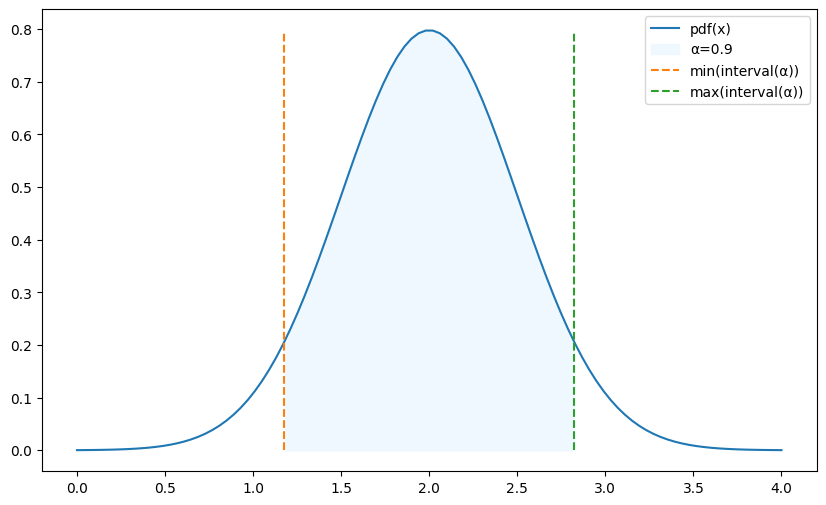

[그림 8-4] interval(α)가 계산하는 x


In [16]:
mean, sigma = 2, 0.5
rv = stats.norm(mean, sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_min, x_max = 0, 4
xs = np.linspace(x_min, x_max, 100)
ax.plot(xs, rv.pdf(xs), label='pdf(x)')

alpha = 0.9
x_alpha_min, x_alpha_max = rv.interval(alpha)
fill_min, fill_max = x_alpha_min, x_alpha_max
xf = np.linspace(fill_min, fill_max, 100)
ax.fill_between(xf, rv.pdf(xf), label=f'α={alpha}',
                color='aliceblue')
ax.vlines(xf.min(), 0, rv.pdf(xs).max(),
          label='min(interval(α))', linestyle='--',
          color='#ff7f0e')
ax.vlines(xf.max(), 0, rv.pdf(xs).max(),
          label='max(interval(α))', linestyle='--',
          color='#2ca02c')

ax.legend()
plt.show()
print('[그림 8-4] interval(α)가 계산하는 x')

- 90% 구간

In [17]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

- $a$와 $b$

In [18]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

- 표준정규분포의 100(1-$α$)% 구간
  - $[z_{1-α/2}, \, z_{α/2}]$

- 표준정규분포의 95% 구간은
  - $[z_{0.975}, \, z_{0.025}]$

- $N(0, 1)$, $N(0, 4)$, $N(1, 1)$ 시각화

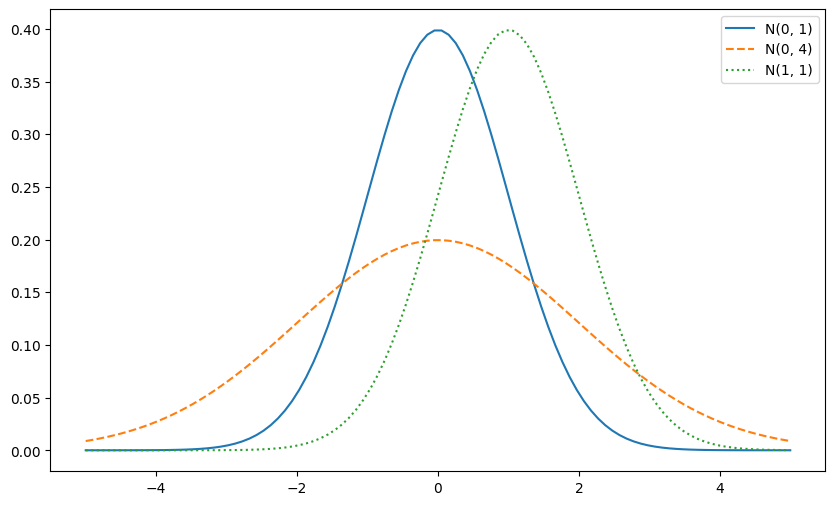

[그림 8-5] 다양한 정규분포


In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls)
ax.legend()

plt.show()
print('[그림 8-5] 다양한 정규분포')

- $μ$ : 평행 이동 &nbsp; / &nbsp; $σ^2$ : 분포 넓어짐

- 정규분포 정리

[표 8-1]

|정규분포의 정리||
|:-:|:-:|
|파라미터|$μ,\,σ$|
|취할 수 있는 값|$(-∞,\,∞)$|
|확률함수|$\frac{1}{\sqrt{2π}σ}\exp\left\{ -\frac{(x-μ)^2}{2σ^2} \right\}$|
|기대값|$μ$|
|분산|$σ^2$|
|scipy.stats|$\text{norm}(μ,σ^2)$|

### 8-2. 지수분포

- **지수분포**(exponential distribution)
  - 사건 발생 간격(시간)
  - 0 이상 실수
  - 파라미터는 $λ$(양의 실수)
  - $\text{Exp}(λ)$

$\text{Exp}(λ)$ 밀도함수

> **지수분포의 밀도함수**

> $$
> f(x) =
> \begin{cases}
> λe^{-λx} & (x ≥ 0) \\\\
> 0 & (otherwise)
> \end{cases}
> \tag{8-4}
> $$

- 구체적인 예

- **하루에 평균 2건의 교통사고가 발생하는 지역에서의 하루 교통사고 발생 간격**
  - $\text{Exp}(2)$
  - 교통사고 후 3일 내 또 교통사고 날 확률

$$P(X≤3) = \int_0^3{2e^{-2x}dx} ≃ 0.998$$

- **한 시간에 평균 10번 액세스하는 사이트에 대한 액세스 간격**
- $\text{Exp}(10)$
- 사이트 액세스 후 1분 내 또 액세스할 확률

$$
P \left( X≤\frac{1}{60} \right) =
\int_0^\frac{1}{60}{10e^{-10x}dx} ≃ 0.154
$$

- 포아송 분포와 관련성

- 단위시간당 $λ$번 발생 사건
  - 발생 건수 $→ Poi(λ)$
  - 발생 간격 $→ \text{Exp}(λ)$

- 기대값 / 분산

> **포아송 분포의 기대값과 분산**

> $X ∼ \text{Exp}(λ)$라고 할 때<br><br>
>
> $$E(X) = \frac{1}{λ}, \quad V(X) = \frac{1}{λ^2} \tag{8-5}$$

- NumPy 구현

In [20]:
def Exp(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

- $X ∼ \text{Exp}(3)$

In [21]:
lam = 3
X = Exp(lam)

- 기대값은 $=\frac{1}{3}$ &nbsp; / &nbsp; 분산은 $=\frac{1}{9}$

In [22]:
check_prob(X)

expected vaue 0.333
variance 0.111


- 밀도함수 / 분포함수 시각화

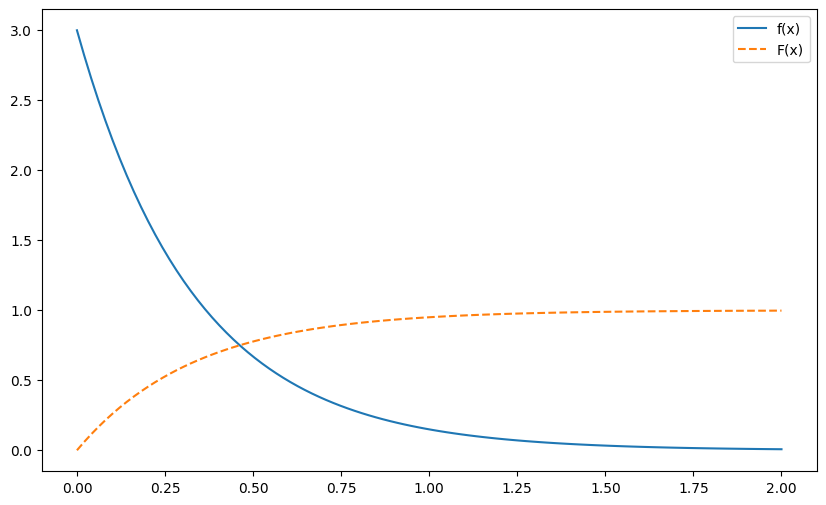

[그림 8-6] 지수분포


In [23]:
plot_prob(X, 0, 2)
print('[그림 8-6] 지수분포')

- scipy.stats
  - expon()
  - 파라미터 $λ →$ 인자 $\frac{1}{λ}$

- $λ = 1,\;2,\;3$

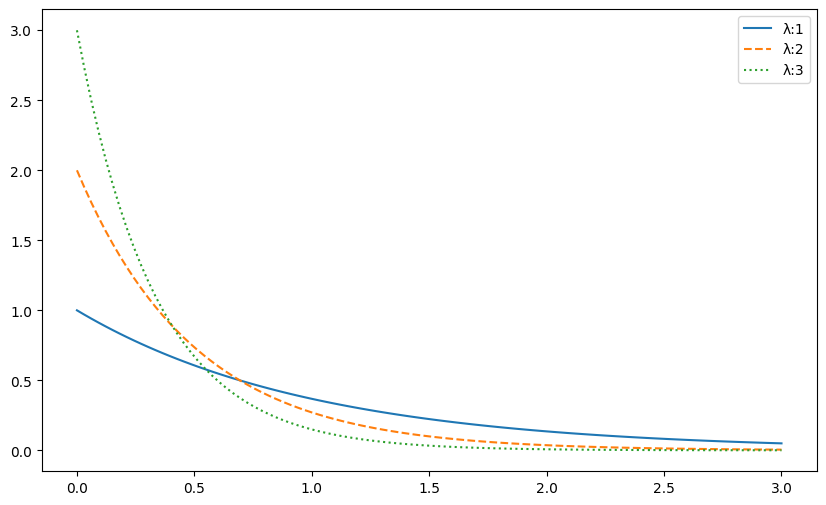

[그림 8-7] 다양한 지수분포


In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'λ:{lam}', ls=ls)
ax.legend()

plt.show()
print('[그림 8-7] 다양한 지수분포')

- 파라미터 커지면 지수적 감소 경향 커짐

- 지수분포 정리

[표 8-2]

|지수분포의 정리||
|:-:|:-:|
|파라미터|$λ$|
|취할 수 있는 값|$[0,\,∞)$|
|확률함수|$λe^{-λx}$|
|기대값|$\frac{1}{λ}$|
|분산|$\frac{1}{λ^2}$|
|scipy.stats|$\text{expon}(\text{scale=}\frac{1}{λ})$|

### 8-3. 카이제곱분포

- 추정 / 검정

- 정규분포와 관련성

- **카이제곱분포**(chi-square distribution)
  - 분산의 구간추정
  - 독립성 검정

- 복수의 표준정규분포로 정의

> **카이제곱분포**

> $Z_1$, $Z_2$, $⋯$, $Z_n$이 서로 독립이고 $N(0, 1)$을 따르고 있을 때, 그 제곱합<br><br>
>
> $$Y = \sum_{i=1}^n{Z_i^2} \tag{8-6}$$<br>
>
> 의 확률분포를 자유도가 $n$인 카이제곱분포라고 한다.

- $χ^2(n)$
  -  0 이상 실수

- 파이썬으로 카이제곱분포 구현
  - $\sum_{i=1}^{10}{Z_i^2}$에서 무작위추출한 크기 100만의 표본

In [25]:
n = 10
# 표준정규분포 확률변수 10개(Zs[0], ... , Zs[9]) 생성
# norm()을 인자없이 호출(기본 인자값 μ=0, σ=1 설정)
Zs = [stats.norm() for _ in range(n)]

# 표준정규분포 확률변수 10개 각각에 대해
# 표본의 크기 100만으로 무작위추출 시행
size = 1000000
Zs_sample = [Z.rvs(size) for Z in Zs]

# 확률변수 10개의 각 표본(크기 100만)에 대해 제곱
Z2s_sample = [Z_sample**2 for Z_sample in Zs_sample]

# 확률변수가 제곱된 각 표본(크기 100만) 10개에 대하여
# 같은 성분끼리 10개씩 더함으로써, 이와 같이 정의된
# 새로운 확률변수 SumZ2의 표본(크기 100만)을 얻게 된다.
SumZ2_sample = [sum(comp) for comp in zip(*Z2s_sample)]

- scipy.stats chi2(10)과 비교

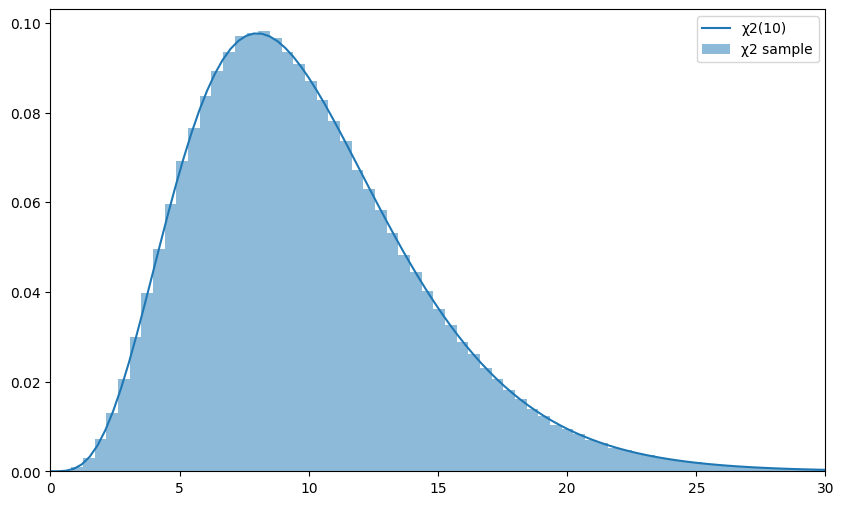

[그림 8-8] 카이제곱분포와 표준정규분포의 관계


In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.plot(xs, rv_true.pdf(xs), label=f'χ2({n})')
ax.hist(SumZ2_sample, bins=100, density=True,
        alpha=0.5, label='χ2 sample', color='#1f77b4')

ax.legend()
ax.set_xlim(0, 30)

plt.show()
print('[그림 8-8] 카이제곱분포와 표준정규분포의 관계')

- $\sum_{i=1}^{10}{Z_i^2} ∼ χ^2(10)$ 확인

- 참고로 간단히 구현

In [27]:
rv = stats.norm()
n, size = 10, 1000000
Zs_smpl = rv.rvs((n, size))
SumZ2_smpl = np.sum(Zs_smpl**2, axis=0)

- 세 가지 모두 비교

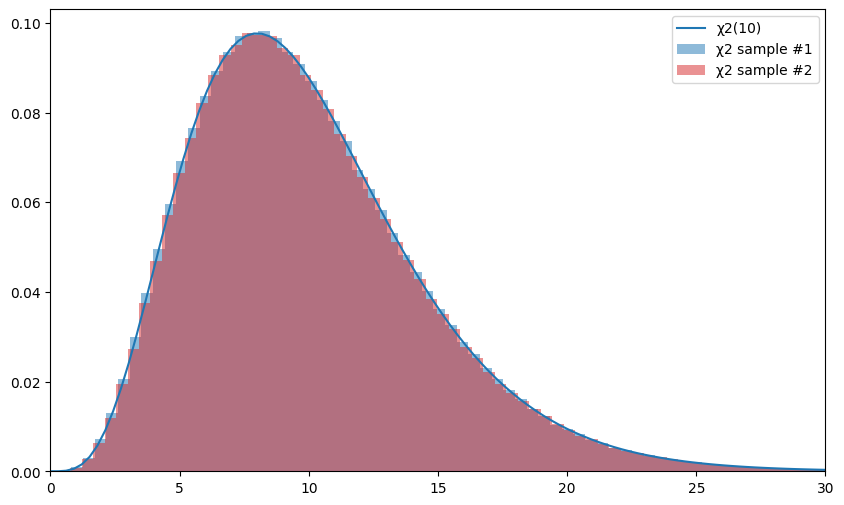

[그림 8-9] NumPy의 sum()에 axis=0 적용한 결과와 비교


In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.plot(xs, rv_true.pdf(xs), label=f'χ2({n})')
ax.hist(SumZ2_sample, bins=100, density=True,
        alpha=0.5, label='χ2 sample #1', color='#1f77b4')
ax.hist(SumZ2_smpl, bins=100, density=True,
        alpha=0.5, label='χ2 sample #2', color='#d62728')

ax.legend()
ax.set_xlim(0, 30)

plt.show()
print('[그림 8-9] NumPy의 sum()에 axis=0 적용한 결과와 비교')

- $n = 3,\;5,\;10$

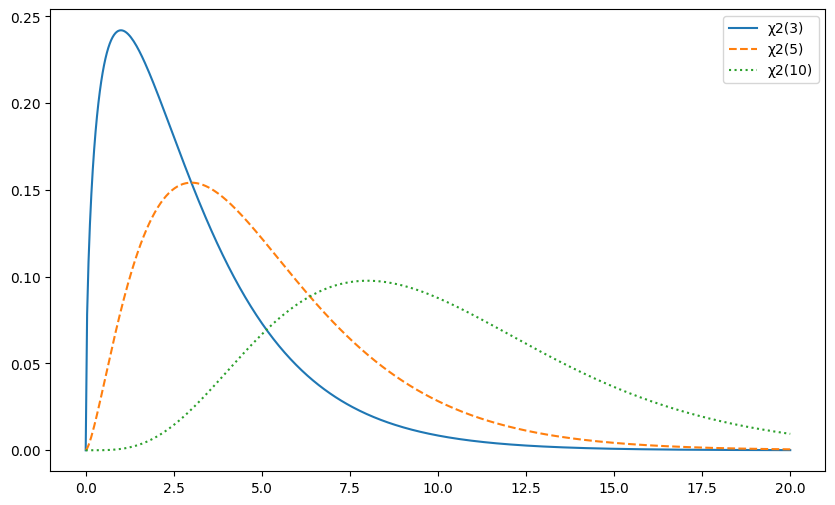

[그림 8-10] 다양한 카이제곱분포


In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'χ2({n})', ls=ls)
ax.legend()

plt.show()
print('[그림 8-10] 다양한 카이제곱분포')

- 카이제곱분포의 특징 세 가지

- 카이제곱분포의 상위 100$α$%점
  - 기호 $χ_α^2(n)$
  - isf() 메서드

- $χ_{0.05}^2(5)$

In [30]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

- 카이제곱분포 정리

[표 8-3]

|카이제곱분포의 정리||
|:-:|:-:|
|파라미터|$n$|
|취할 수 있는 값|$[0,\,∞)$|
|scipy.stats|$\text{chi2}(n)$|

### 8-4. t 분포

- **t 분표**(t distribution)
  - 모평균의 구간추정

- 표준정규분포와 카이제곱분포로 정의

> **t 분포**

> 확률변수 $Z$, $Y$는 서로 독립이고,
- $Z$는 표준정규분포 $N(0, 1)$을,
- $Y$는 자유도가 $n$인 카이제곱분포 $χ^2(n)$을 각각 따를 때,<br><br>
>
> $$t = \frac{Z}{\sqrt{Y/n}} \tag{8-7}$$<br>
>
> 의 확률분포를 자유도가 $n$인 t 분포라고 한다.

- $t(n)$
  - 실수 전체

- t 분포 구현
  - $\frac{Z}{\sqrt{Y/10}}$에서 무작위추출

In [31]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

size = 1000000
Z_sample = rv1.rvs(size)
chi2_sample = rv2.rvs(size)

t_sample = Z_sample / np.sqrt(chi2_sample / n)

- scipy.stats t(10)과 비교

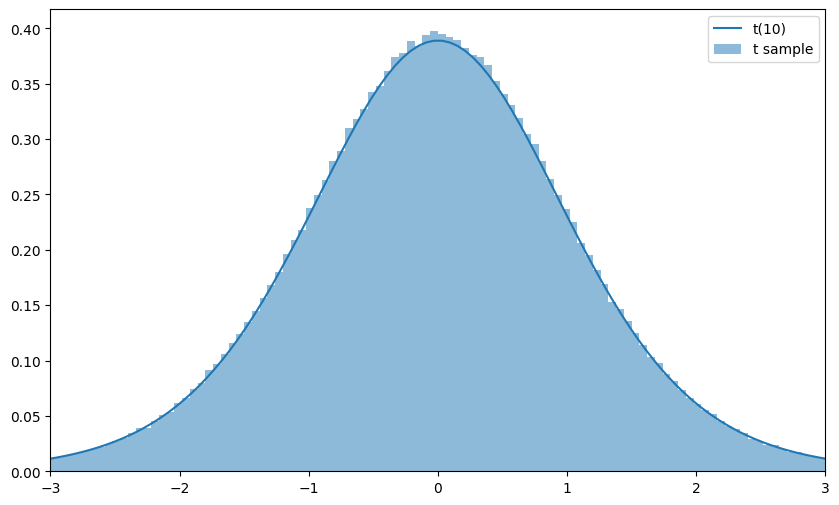

[그림 8-11] t 분포와 다른 분포의 관계


In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.plot(xs, rv.pdf(xs), label=f't({n})')
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5,
        label='t sample', color='#1f77b4')

ax.legend()
ax.set_xlim(-3, 3)

plt.show()
print('[그림 8-11] t 분포와 다른 분포의 관계')

- $\frac{Z}{\sqrt{Y/10}} ∼ t(10)$ 확인

- $n = 3,\;5,\;10,\;$ 표준정규분포

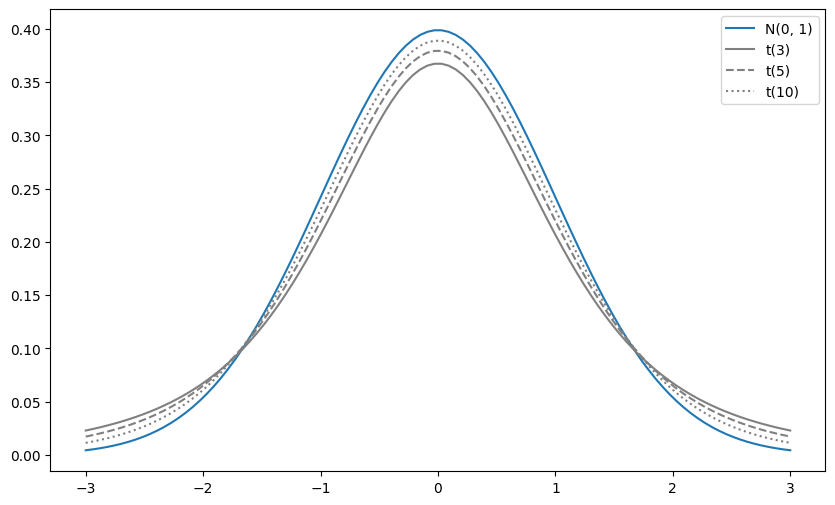

[그림 8-12] 다양한 t 분포


In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label=f't({n})',
            ls=ls, color='grey')
    
ax.legend()
plt.show()
print('[그림 8-12] 다양한 t 분포')

- t 분포의 특징 세 가지

- t 분포의 상위 100$α$%점
  - 기호 $t_α(n)$
  - isf() 메서드

- $t_{0.05}(5)$

In [34]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

- t 분포 정리

[표 8-4]

|t 분포의 정리||
|:-:|:-:|
|파라미터|$n$|
|취할 수 있는 값|$(-∞,\,∞)$|
|scipy.stats|$\text{t}(n)$|

### 8-5. F 분포

- **F 분표**(F distribution)
  - 분산분석 등

- 두 개의 카이제곱분포로 정의

> **F 분포**

> 확률변수 $Y_1$, $Y_2$는 서로 독립이고, 각각 $Y_1∼χ^2(n_1)$, $Y_2∼χ^2(n_2)$를 따를 때,<br><br>
>
> $$F = \frac{Y_1/n_1}{Y_2/n_1} \tag{8-8}$$<br>
>
> 의 확률분포를 자유도가 $n_1$, $n_2$인 F 분포 $F(n_1, n_2)$라고 한다.

- $F(n_1, n_2)$
  - 0 이상 실수

- F 분포 구현
  - $\frac{Y_1/5}{Y_2/10}$에서 무작위추출

In [35]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

size = 1000000
sample1 = rv1.rvs(size)
sample2 = rv2.rvs(size)

F_sample = (sample1/n1) / (sample2/n2)

- scipy.stats f(5, 10)과 비교

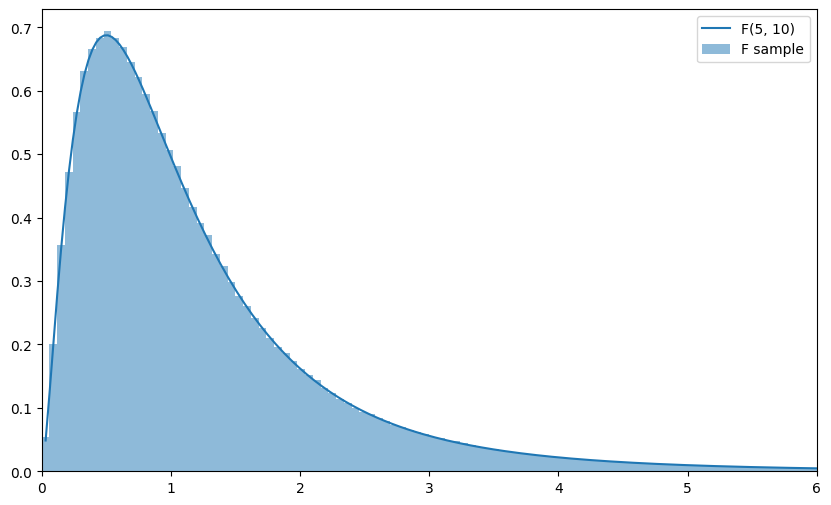

[그림 8-13] F 분포와 카이제곱분포의 관계


In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})')
ax.hist(F_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5,
        label='F sample', color='#1f77b4')

ax.legend()
ax.set_xlim(0, 6)

plt.show()
print('[그림 8-13] F 분포와 카이제곱분포의 관계')

- $\frac{Y_1/5}{Y_2/10} ∼ F(5, 10)$ 확인

- $n_2=10\;\;\;\;\;n_1=3,\;5,\;10$

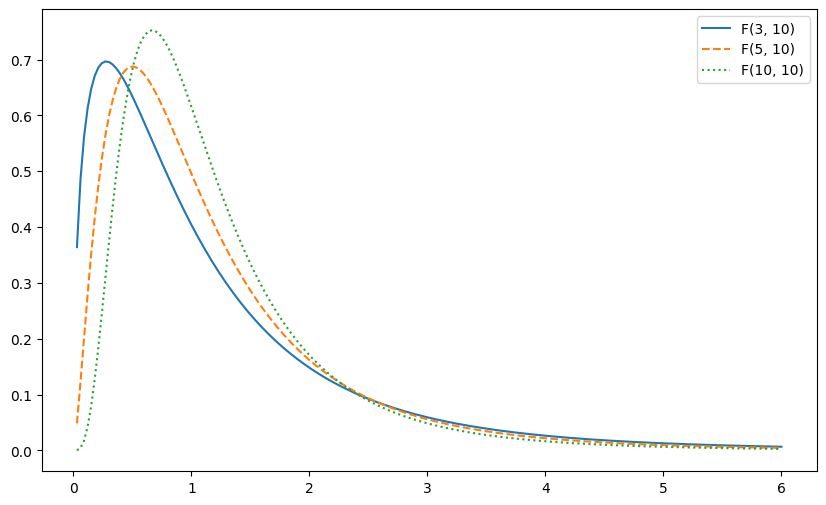

[그림 8-14] 다양한 F 분포


In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls)
    
ax.legend()
plt.show()
print('[그림 8-14] 다양한 F 분포')

- F 분포의 특징 두 가지

- F 분포 정리

[표 8-5]

|F 분포의 정리||
|:-:|:-:|
|파라미터|$n_1,\,n_2$|
|취할 수 있는 값|$[0,\,∞)$|
|scipy.stats|$\text{f}(n_1,n_2)$|